# Basic usage of ABCD database

In [1]:
import sys
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

from abcd import ABCD

First of all, we need to define the url of the database. It could be local or remote:

- direct access: url = 'mongodb://localhost:27017'
- api access: url = 'http://localhost/api'

In [3]:
abcd = ABCD(url='mongodb://localhost:27017')
print(abcd)

MongoDatabase(url=localhost:27017, db=abcd, collection=atoms)


Basic information about the database:

In [4]:
abcd.print_info()

================== ABCD MongoDB ==================
      type: mongodb
      host: localhost
      port: 27017
        db: abcd
collection: atoms
number of confs: 59174


The data stored in the database:

In [5]:
# abcd.db.atoms.find_one()
# abcd.db.atoms.find_one({ "info.pbc": [True, True, True] })

## Discovery/Filtering

### Available properties

In [7]:
abcd.count_properties()['arrays']

{'n_neighb': {'count': 62},
 'force': {'count': 59174},
 'map_shift': {'count': 62},
 'positions': {'count': 59174},
 'numbers': {'count': 59174}}

### Histogram

In [8]:
Counter(abcd.get_property('info.config_type'))

Counter({'quadvacancy_124_high': 28,
         'phonons_54_high': 434,
         'monovacancy_53_high': 762,
         'doublevacancy_126_2NN_high': 48,
         'slice_sample_high': 12002,
         'phonons_128_high': 180,
         'slice_sample': 12000,
         'md_bulk': 300,
         'vacancy': 1680,
         'bcc_bulk_54_high': 28,
         'surface_100': 110,
         'surface_110': 98,
         'surface_111': 86,
         'surface_211': 108,
         'self_interstitial_100_high': 42,
         'self_interstitial_110_high': 24,
         'self_interstitial_111_high': 74,
         'self_interstitial_oct_high': 32,
         'self_interstitial_tet_high': 50,
         'self_interstitial_xxy_high': 48,
         'gamma_surface_110': 5000,
         'gamma_surface_112': 4898,
         'doublevacancy_126_1NN_high': 46,
         'bcc_doublevacancy_126_high': 78,
         'quinvacancy_123_high': 24,
         'self_di_interstitial_npc_130_high': 36,
         'trivacancy_100_125_high': 30,
      

In [9]:
query = {
    'info.config_type': 'bcc_bulk_54_high'
}
abcd.count(query)

28

In [10]:
Counter(abcd.get_property('info.config_name', query))

Counter({'bcc_bulk_54_expanded_2_0000': 2,
         'bcc_bulk_54_expanded_2_0001': 2,
         'bcc_bulk_54_expanded_2_0002': 2,
         'bcc_bulk_54_expanded_2_0003': 2,
         'bcc_bulk_54_expanded_2_0004': 2,
         'bcc_bulk_54_expanded_2_0005': 2,
         'bcc_bulk_54_expanded_2_0006': 2,
         'bcc_bulk_54_expanded_2_0007': 2,
         'bcc_bulk_54_expanded_2_0008': 2,
         'bcc_bulk_54_expanded_2_0009': 2,
         'bcc_bulk_54_expanded_2_0010': 2,
         'bcc_bulk_54_expanded_2_0011': 2,
         'bcc_bulk_54_expanded_2_0012': 2,
         'bcc_bulk_54_expanded_2_0013': 2})

### Filtering

In [11]:
query = {
    'info.config_type': 'bcc_bulk_54_high',
    'info.pbc': [True, True, True]
}

abcd.count(query)

28

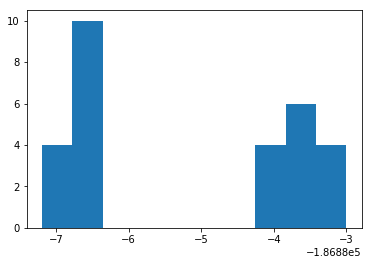

(-186887.19402, -186882.999145)

In [12]:
data = abcd.get_property('info.energy', query)
hist, bins, ax = plt.hist(data)
plt.show()
min(data), max(data)

In [13]:
query = {
    'info.config_type': 'bcc_bulk_54_high',
    'info.energy': {'$gt': -186885.0},
    'info.pbc': [True, True, True],
}
abcd.count(query)

14

In [14]:
abcd.count_properties(query)['arrays']

{'force': {'count': 14}, 'positions': {'count': 14}, 'numbers': {'count': 14}}

## Fetching the data

In [15]:
query = {
    'info.config_type': 'bcc_bulk_54_high',
    'info.energy': {'$gt': -186885.0},
    'info.pbc': [True, True, True],
    'arrays.force': {'$exists': True}
}
abcd.count(query)

14

In [16]:
traj = list(abcd.get_atoms(query))

In [17]:
traj

[Atoms(symbols='Fe54', pbc=True, cell=[8.6368128, 8.6368128, 8.6368128], force=..., calculator=SinglePointCalculator(...)),
 Atoms(symbols='Fe54', pbc=True, cell=[8.6368128, 8.6368128, 8.6368128], force=..., calculator=SinglePointCalculator(...)),
 Atoms(symbols='Fe54', pbc=True, cell=[8.6368128, 8.6368128, 8.6368128], force=..., calculator=SinglePointCalculator(...)),
 Atoms(symbols='Fe54', pbc=True, cell=[8.6368128, 8.6368128, 8.6368128], force=..., calculator=SinglePointCalculator(...)),
 Atoms(symbols='Fe54', pbc=True, cell=[8.6368128, 8.6368128, 8.6368128], force=..., calculator=SinglePointCalculator(...)),
 Atoms(symbols='Fe54', pbc=True, cell=[8.6368128, 8.6368128, 8.6368128], force=..., calculator=SinglePointCalculator(...)),
 Atoms(symbols='Fe54', pbc=True, cell=[8.6368128, 8.6368128, 8.6368128], force=..., calculator=SinglePointCalculator(...)),
 Atoms(symbols='Fe54', pbc=True, cell=[8.6368128, 8.6368128, 8.6368128], force=..., calculator=SinglePointCalculator(...)),
 Atoms(s

## Extra

In [ ]:
abcd.db.atoms.count_documents({'arrays.numbers':{'$all': [26]}})

In [ ]:
abcd.db.atoms.count_documents({'arrays.numbers':{'$in': [26, 74]}})